In [1]:
# Tweets dataset - https://www.kaggle.com/omermetinn/tweets-about-the-top-companies-from-2015-to-2020
# Stock dataset - https://www.kaggle.com/paultimothymooney/stock-market-data

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!pip install vaderSentiment

You should consider upgrading via the 'c:\users\shubh\desktop\pixsy\ml-retraining\pixsy_work\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
company_tweets = pd.read_csv("archive/Company_Tweet.csv")# This file should be downloaded using the above-mentioned link (tweet dataset)
tweet = pd.read_csv("archive/Tweet.csv")# This file should be downloaded using the above-mentioned link (tweet dataset)

In [6]:
tweets = pd.merge(company_tweets, tweet, on='tweet_id', how='inner')
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [8]:
tweets.shape

(4336445, 8)

In [7]:
sentences = tweets["body"]
sentenceSample = sentences[:10]
sentenceSampleDf=pd.DataFrame(sentenceSample)
sentenceSampleDf

,body
0,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
1,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
3,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
4,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
5,Rumor Roundup: What to expect when you're expe...
6,"An $AAPL store line in Sapporo Japan for the ""..."
7,$AAPL - Will $AAPL Give Second entry opportuni...
8,Will $AAPL Give Second entry opportunity? $AAP...
9,We will book gains in half dozen picks tomorro...


#### Threshold for negative tweets
A tweet is classified as a negative tweet only if vaderSentiment scores it above 0.7 on negative sentiment.

In [9]:
def negativityCheck(sentence):
    if(analyzer.polarity_scores(sentence)["neg"]>0.7):
        return 1
    else:
        return 0

In [10]:
tweets["negative_sentiment"] = pd.DataFrame(sentences.apply(negativityCheck).tolist())
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,0
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,0
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,0


#### Filtering Negative Tweets
We'll filter out the negative tweets after the sentiment analysis and try to see if this corresponds to a significatly lower closing prices on days where the volume of negative tweets were high.

In [11]:
negativeTweeets = tweets.loc[tweets["negative_sentiment"]==1]

In [13]:
negativeTweeets.shape

(684, 9)

In [12]:
tweets.ticker_symbol.unique()

array(['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'GOOG', 'MSFT'], dtype=object)

Well try to see if negative tweets about amazon over the years have had any effect on its stock price, please note we are only considering number of tweets here, neither is importance of people tweeting, number of retwets likes etc factored in.

In [14]:
negativeTweetsAmazon = negativeTweeets.loc[negativeTweeets['ticker_symbol'] =="AMZN"]
amazonDf = pd.read_csv("archive/AMZN.csv")

In [16]:
amazonDf

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,1.927083,2.437500,72156000,2.500000,1.958333,1.958333
1,16-05-1997,1.708333,1.968750,14700000,1.979167,1.729167,1.729167
2,19-05-1997,1.625000,1.760417,6106800,1.770833,1.708333,1.708333
3,20-05-1997,1.635417,1.729167,5467200,1.750000,1.635417,1.635417
4,21-05-1997,1.375000,1.635417,18853200,1.645833,1.427083,1.427083
...,...,...,...,...,...,...,...
6225,08-02-2022,3111.010010,3135.010010,3802000,3235.850098,3228.270020,3228.270020
6226,09-02-2022,3205.000000,3257.469971,3439300,3276.689941,3223.790039,3223.790039
6227,10-02-2022,3155.000000,3167.000000,3413400,3214.330078,3180.070068,3180.070068
6228,11-02-2022,3054.679932,3162.689941,3851600,3180.000000,3065.870117,3065.870117


In [41]:
import datetime
negativeTweetsAmazon['Date'] = pd.to_datetime(negativeTweetsAmazon['post_date'],unit='s').dt.strftime('%d-%m-%Y')
negativeTweetsAmazon

C:\Users\shubh\AppData\Local\Temp/ipykernel_19864/3193720094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativeTweetsAmazon['Date'] = pd.to_datetime(negativeTweetsAmazon['post_date'],unit='s').dt.strftime('%d-%m-%Y')


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment,Date
1471910,1055793751610810368,AMZN,BZstockss,1540555820,$ARYC Hell ya!,0,2,3,1,26-10-2018
1529692,1074429688855126016,AMZN,PennyGodfather,1544998974,That's no H/S friend,0,0,0,1,16-12-2018
1546978,1080842025086398464,AMZN,kamiari_,1546527794,Puke Puke Puke!!!! $SPX $NFLX $AMZN $AAPL,0,0,1,1,03-01-2019
2544920,558322371283922944,AMZN,sonaliranade,1421949401,No $AMZN LOL,0,0,0,1,22-01-2015
2587463,621694276586577920,AMZN,parabolicoption,1437058440,$AMZN firing...,0,0,0,1,16-07-2015
...,...,...,...,...,...,...,...,...,...,...
3094413,1197588955673309184,AMZN,Pennywinning7,1574362431,$amzn ugh,0,0,0,1,21-11-2019
3097872,1202267422302060544,AMZN,AldrinWong,1575477865,$AMZN wrong!,0,0,0,1,04-12-2019
3098370,1202678620088610816,AMZN,Mr_MoonStocks,1575575902,Wtf $amzn,0,0,0,1,05-12-2019
3103705,1210242544111480832,AMZN,LAVAoption,1577379282,$AMZN CRAZY!!!,0,1,3,1,26-12-2019


In [17]:
amazonInfluence= pd.merge(negativeTweetsAmazon,amazonDf,on="Date",how="inner")
amazonInfluence.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1055793751610810368,AMZN,BZstockss,1540555820,$ARYC Hell ya!,0,2,3,1,26-10-2018,1603.000000,1649.589966,14963800,1698.459961,1642.810059,1642.810059
1,1080842025086398464,AMZN,kamiari_,1546527794,Puke Puke Puke!!!! $SPX $NFLX $AMZN $AAPL,0,0,1,1,03-01-2019,1497.109985,1520.010010,6975600,1538.000000,1500.280029,1500.280029
2,558322371283922944,AMZN,sonaliranade,1421949401,No $AMZN LOL,0,0,0,1,22-01-2015,300.000000,300.000000,5362600,312.250000,310.320007,310.320007
3,621694276586577920,AMZN,parabolicoption,1437058440,$AMZN firing...,0,0,0,1,16-07-2015,464.799988,465.500000,4095600,475.880005,475.480011,475.480011
4,624310535408893953,AMZN,TRADEaddiction,1437682205,$AMZN leak?,1,0,0,1,23-07-2015,475.700012,491.660004,9374400,491.660004,482.179993,482.179993


In [45]:
tweetsOnAmazonDateCount= negativeTweetsAmazon["Date"].value_counts()
tweetsOnAmazonDateCount = pd.DataFrame(tweetsOnAmazonDateCount)
tweetsOnAmazonDateCount.head()
tweetsOnAmazonDateCount.reset_index(inplace=True)
tweetsOnAmazonDateCount["count"] = tweetsOnAmazonDateCount["Date"]
tweetsOnAmazonDateCount.drop("Date",axis=1,inplace=True)
tweetsOnAmazonDateCount["Date"] = tweetsOnAmazonDateCount["index"]

In [46]:
tweetsOnAmazonDateCount

,index,count,Date
0,09-08-2019,3,09-08-2019
1,27-04-2018,2,27-04-2018
2,24-10-2019,2,24-10-2019
3,23-08-2018,2,23-08-2018
4,25-10-2019,2,25-10-2019
...,...,...,...
117,01-07-2019,1,01-07-2019
118,10-09-2018,1,10-09-2018
119,28-09-2018,1,28-09-2018
120,09-08-2017,1,09-08-2017


In [61]:
amazonInfluenceByNo= pd.merge(tweetsOnAmazonDateCount,amazonDf,on="Date",how="inner")
amazonInfluenceByNo.head(10)

,index,count,Date,Low,Open,Volume,High,Close,Adjusted Close
0,09-08-2019,3,09-08-2019,1802.219971,1828.949951,2879800,1831.089966,1807.579956,1807.579956
1,27-04-2018,2,27-04-2018,1567.390015,1634.010010,13053200,1638.099976,1572.619995,1572.619995
2,24-10-2019,2,24-10-2019,1760.270020,1771.089966,4446100,1788.339966,1780.780029,1780.780029
3,23-08-2018,2,23-08-2018,1900.760010,1907.170044,3563000,1919.500000,1902.900024,1902.900024
4,25-10-2019,2,25-10-2019,1695.000000,1697.550049,9626400,1764.209961,1761.329956,1761.329956
5,10-01-2019,2,10-01-2019,1621.619995,1641.010010,6507700,1663.250000,1656.219971,1656.219971
6,01-02-2018,2,01-02-2018,1385.140015,1445.000000,9113800,1459.880005,1390.000000,1390.000000
7,28-07-2016,2,28-07-2016,739.700012,745.979980,7617600,753.359985,752.609985,752.609985
8,17-03-2016,2,17-03-2016,555.010010,569.510010,5928100,571.400024,559.440002,559.440002
9,17-12-2018,2,17-12-2018,1505.010010,1566.000000,8829800,1576.130005,1520.910034,1520.910034


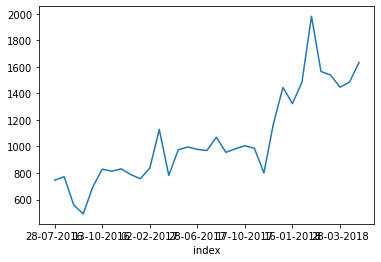

In [63]:
import matplotlib.pyplot as plt
amazonInfluenceByNo.set_index("index",inplace=True)
amazonInfluenceByNo.loc["28-07-2016"]
ax= amazonInfluenceByNo.loc['28-07-2016':'27-04-2018',"Open"].plot()

,count,Date,Low,Open,Volume,High,Close,Adjusted Close,dateTime
index,,,,,,,,,
22-01-2015,1,22-01-2015,300.000000,300.000000,5362600,312.250000,310.320007,310.320007,2015-01-22
07-12-2015,1,07-12-2015,660.500000,674.739990,3732800,675.460022,669.830017,669.830017,2015-07-12
16-07-2015,1,16-07-2015,464.799988,465.500000,4095600,475.880005,475.480011,475.480011,2015-07-16
23-07-2015,2,23-07-2015,475.700012,491.660004,9374400,491.660004,482.179993,482.179993,2015-07-23
22-10-2015,1,22-10-2015,556.669983,562.700012,7779400,569.150024,563.909973,563.909973,2015-10-22


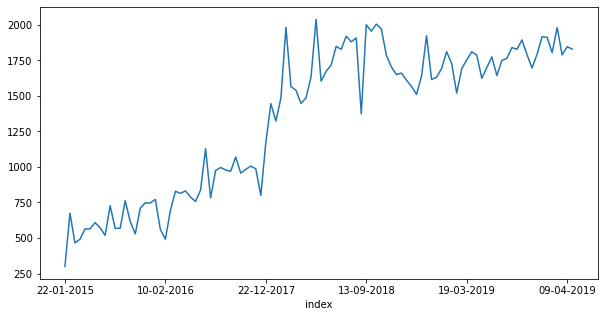

In [64]:
amazonInfluenceByNo["dateTime"] = pd.to_datetime(amazonInfluenceByNo["Date"])
amazonInfluenceByNo = amazonInfluenceByNo.sort_values(by="dateTime")                                                    
bx= amazonInfluenceByNo.loc['22-01-2015':'09-08-2019',"Open"].plot(figsize=(10,5))

amazonInfluenceByNo.head()

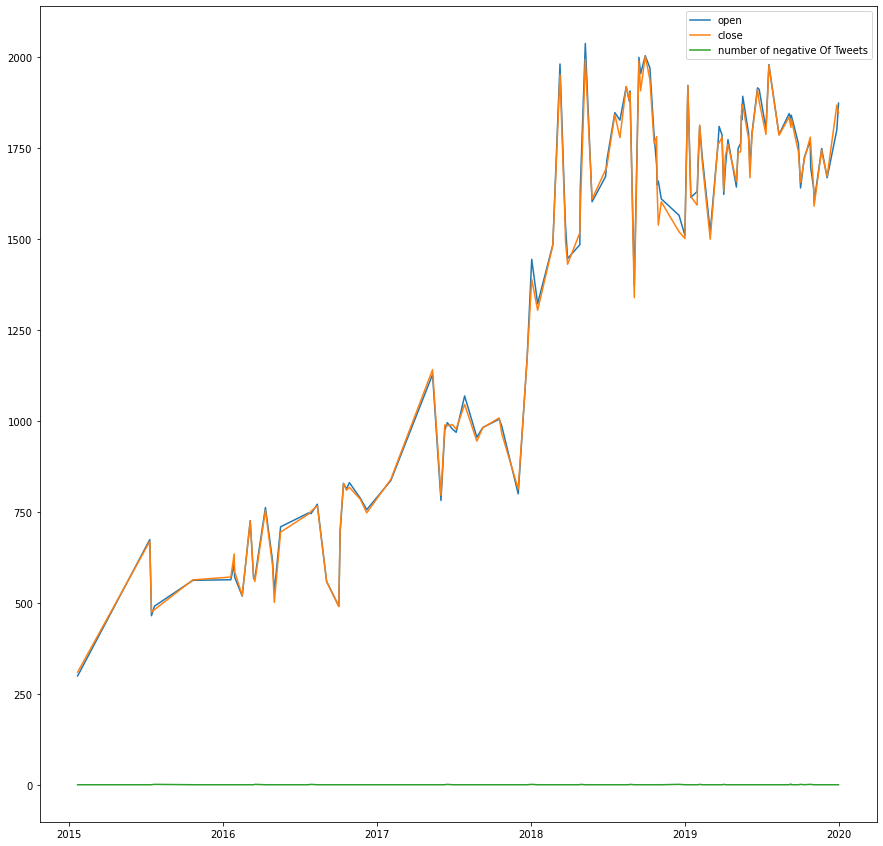

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

openingValues= amazonInfluenceByNo["Open"]
closingValues = amazonInfluenceByNo["Close"]
countTweet = amazonInfluenceByNo["count"]

dates = amazonInfluenceByNo["dateTime"]

ax.plot(dates,openingValues,label="open")
ax.plot(dates,closingValues,label="close")
ax.plot(dates,countTweet,label="number of negative Of Tweets")

ax.legend()

####  Building a more general approach

In [67]:
prices = pd.read_csv('archive\Top 5 companies stocks 2010-2020.csv' )
# TODO: add function to parse datetime

prices['day_date'] = pd.to_datetime(prices["day_date"]).dt.strftime('%d-%m-%Y') # changing format
prices['day_date'] = pd.to_datetime(prices["day_date"])# assigning datetime data type

prices.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [68]:
company_tweet = pd.read_csv('archive/Company_Tweet.csv')
tweet = pd.read_csv('archive/Tweet.csv')
tweets = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
total = tweets["comment_num"] + tweets["retweet_num"] + tweets["like_num"]
tweets["total_engangement"] = total
tweets["Date"] = pd.to_datetime(tweets['post_date'],unit='s').dt.strftime('%d-%m-%Y')
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,Date
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1,01-01-2015
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1,01-01-2015
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1,01-01-2015
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1,01-01-2015
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1,01-01-2015


We filter out the posts that did not gain much attention and so are likely to have less of an impact.

In [69]:
filtered = tweets.loc[tweets["total_engangement"] > 200]#  200 here is an artbitrary number, feel free to choose any number here
filtered = filtered.drop(labels="post_date" ,axis=1)
filtered = filtered.sort_values(["total_engangement"] , ascending = False)

In [70]:
def getSentiment(body):
    
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    
    assert body is not None
    vs = analyzer.polarity_scores(body)
    score = vs['compound']
    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negetive"
    
    print(score)

filtered['Sentiment'] = filtered['body'].apply(lambda x: getSentiment(x))
print(filtered["Sentiment"].value_counts())
filtered = filtered.loc[filtered["Sentiment"] != "Neutral"]
print(filtered[:10][["ticker_symbol" ,"Sentiment" , "Date"]])

Positive    2752
Neutral     1763
Negetive    1338
Name: Sentiment, dtype: int64
        ticker_symbol Sentiment        Date
99172            AAPL  Positive  09-03-2015
2752419          AMZN  Negetive  03-01-2017
3803543          TSLA  Negetive  23-07-2018
2806205          AMZN  Negetive  16-06-2017
235457           AAPL  Positive  24-06-2015
3941734          TSLA  Negetive  23-10-2018
3799533          TSLA  Negetive  19-07-2018
2234317          GOOG  Negetive  03-06-2019
4306536          TSLA  Positive  26-11-2019
3903110          TSLA  Negetive  27-09-2018


In [71]:
def getGraph(stock , date , daysBefore, daysAfter ):
    
    import datetime
    
    date = pd.to_datetime(date)
    
    
    start1 = date - datetime.timedelta(days=daysBefore)

    
    end1 = date + datetime.timedelta(days=daysAfter)
    
    temp = prices
    
    temp = temp.loc[prices["ticker_symbol"]  == stock]
    temp = temp.loc[temp["day_date"] > start1]
    temp = temp.loc[temp["day_date"] < end1]
    
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt

    figure(figsize=(16, 10))
#     sns.set_style("tik")
    plt.xlabel("Date" , fontsize = 18)
    plt.ylabel(f"{stock} Price" , fontsize = 18)
    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'open_value',
        color = 'green' , 
    )

    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'close_value', 
        color = 'red'
    )
    plt.axvline(x=date , color = '#42E3BB')
    
    plt.legend(labels=["Day Open","Day Close" , "Date Posted" ],fontsize = 16)

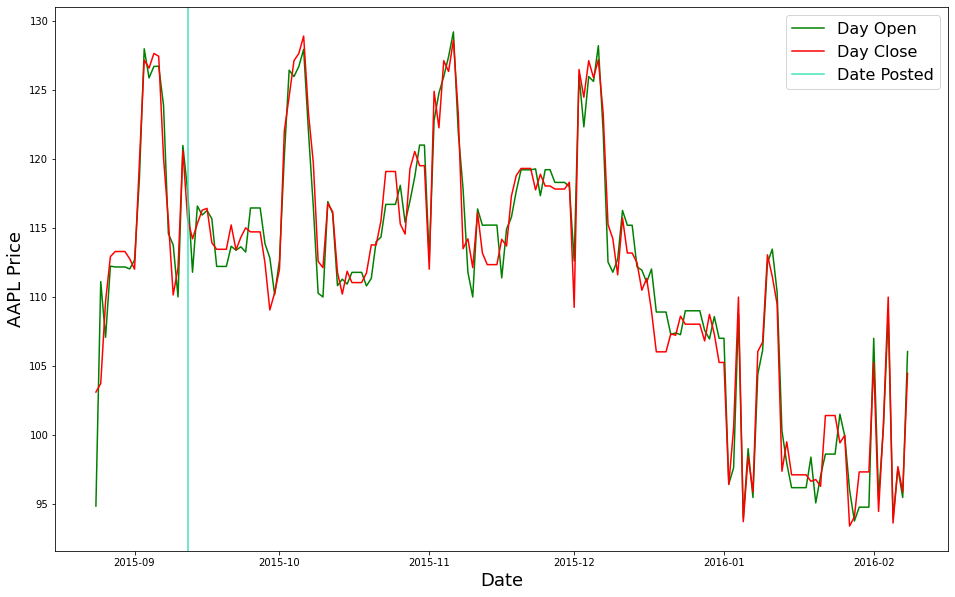

In [72]:
getGraph('AAPL' , '9-12-2015' , 20,  150) # 1 -- +  no

Looking at date at Price of AAPL the price remains unchanged and there appear to be no positive increase.

#### Result
Since the chart shows that number the share price of amazon had kept on increasing , inspite of having at least 1 negative tweet per day, there isin't a considerable differnce between opening and closing prices either on the days of these tweets. Although we cannot conclude that tweets donot afftect share prices, in this case it can be observed that such a small volume cannot affect the share price of a company over a long period.